In [8]:
%pylab inline
%load_ext autoreload
%autoreload 2

from GPyOpt.methods import BayesianOptimization
import GPy
import GPyOpt
from numpy.random import seed
from tqdm import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [35]:
f = 

SyntaxError: invalid syntax (<ipython-input-35-c3962b126481>, line 1)

In [31]:
myf = objective_true.f

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-100,100)},
          {'name': 'var_2', 'type': 'continuous', 'domain': (-100,100)}]
max_iter = 20

In [32]:
myProblem = BayesianOptimization(myf,bounds,acquisition_type="BinaryT")

  0%|          | 0/20 [00:00<?, ?it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]]


  5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]]


 10%|█         | 2/20 [00:01<00:16,  1.07it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]]


 15%|█▌        | 3/20 [00:02<00:15,  1.09it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]]


 20%|██        | 4/20 [00:03<00:14,  1.11it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]]


 25%|██▌       | 5/20 [00:04<00:12,  1.16it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]]


 30%|███       | 6/20 [00:05<00:12,  1.14it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]]


 35%|███▌      | 7/20 [00:06<00:11,  1.14it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]]


 40%|████      | 8/20 [00:07<00:10,  1.10it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]]


 45%|████▌     | 9/20 [00:07<00:09,  1.14it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]]


 50%|█████     | 10/20 [00:08<00:09,  1.08it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]]


 55%|█████▌    | 11/20 [00:09<00:08,  1.12it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]]


 60%|██████    | 12/20 [00:10<00:06,  1.15it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]]


 65%|██████▌   | 13/20 [00:11<00:06,  1.05it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]]


 70%|███████   | 14/20 [00:12<00:05,  1.05it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]]


 75%|███████▌  | 15/20 [00:13<00:04,  1.05it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]
 [-12.08581962 -47.6318054 ]]


 80%|████████  | 16/20 [00:14<00:03,  1.07it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]
 [-12.08581962 -47.6318054 ]
 [-23.60016015 -78.98620847]]


 85%|████████▌ | 17/20 [00:15<00:03,  1.02s/it]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]
 [-12.08581962 -47.6318054 ]
 [-23.60016015 -78.98620847]
 [-73.4432596  -88.12099858]]


 90%|█████████ | 18/20 [00:16<00:01,  1.02it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]
 [-12.08581962 -47.6318054 ]
 [-23.60016015 -78.98620847]
 [-73.4432596  -88.12099858]
 [ 50.19427288 -39.78555511]]


 95%|█████████▌| 19/20 [00:17<00:00,  1.06it/s]

[[ 36.45089466  29.62283355]
 [ 86.61690344  -7.45583109]
 [-35.32535474  24.12766722]
 [ 40.67615291  91.71231413]
 [  3.42044432  83.83952801]
 [-53.04145371  72.79645811]
 [-39.23530098 -41.6459822 ]
 [ 17.35502904  -2.29712715]
 [-72.80875069  44.06156142]
 [ 26.59087892 -70.96507953]
 [ 82.15326002  31.67938043]
 [ 45.00622593 -95.6306039 ]
 [ 18.38428736 -94.51578257]
 [ 23.38706277  57.25519866]
 [-69.83394704  14.41662673]
 [-64.40065705 -37.29017749]
 [ 90.32995304  93.33602743]
 [-35.52155511  50.52702425]
 [ 84.45435459 -75.19599176]
 [ -5.74556757  54.02953093]
 [-12.08581962 -47.6318054 ]
 [-23.60016015 -78.98620847]
 [-73.4432596  -88.12099858]
 [ 50.19427288 -39.78555511]
 [-26.73980626 -14.83819358]]


100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


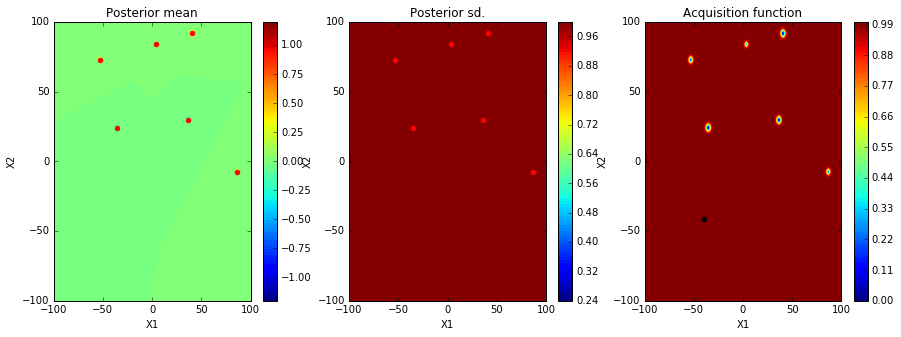

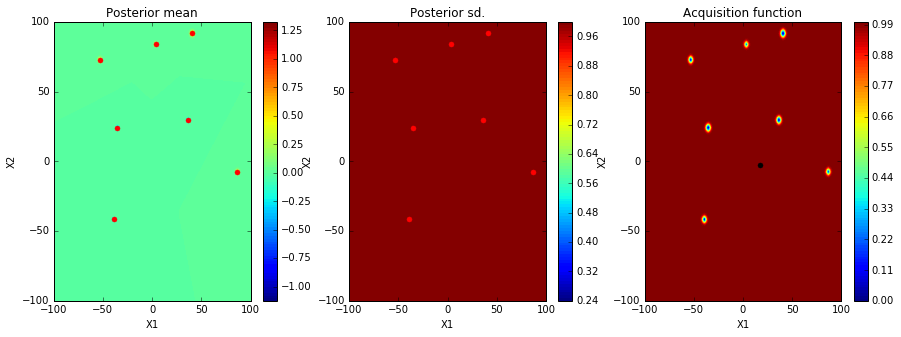

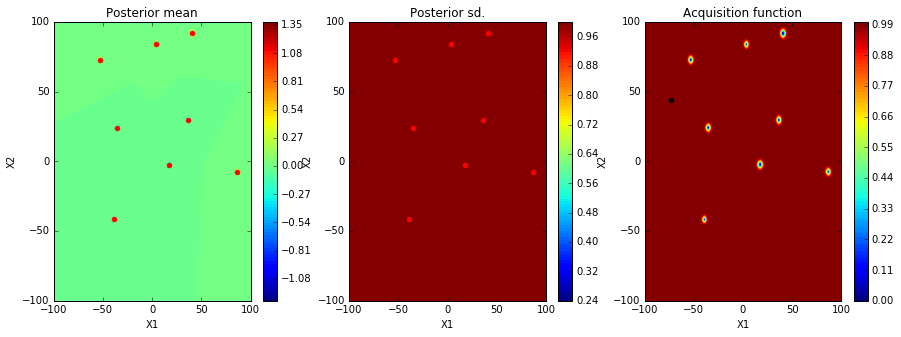

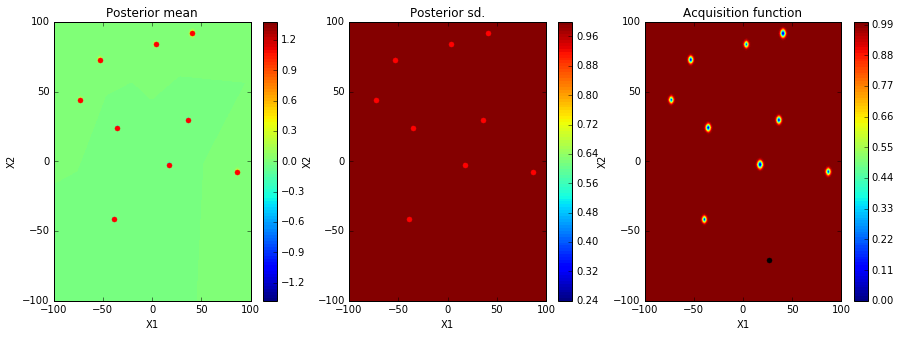

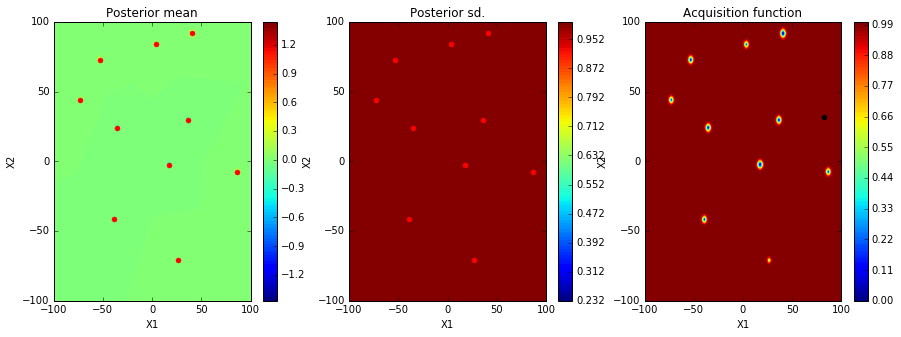

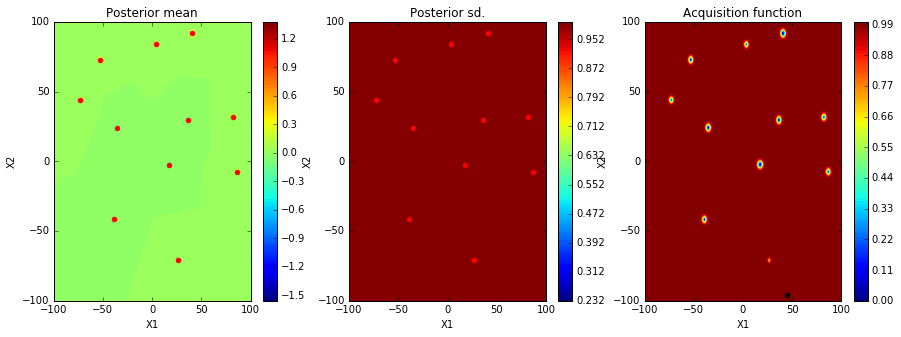

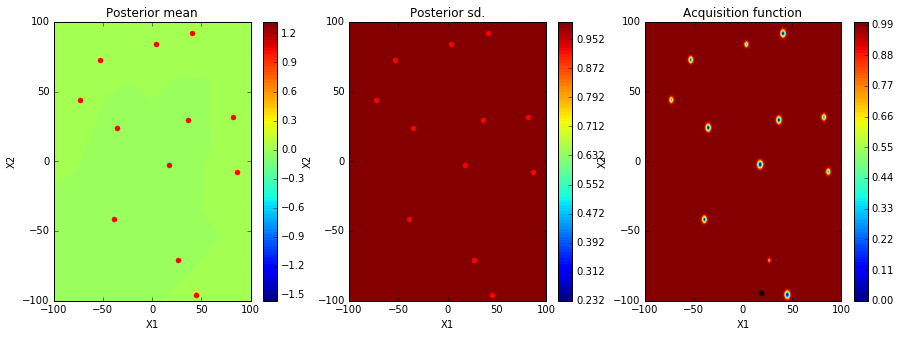

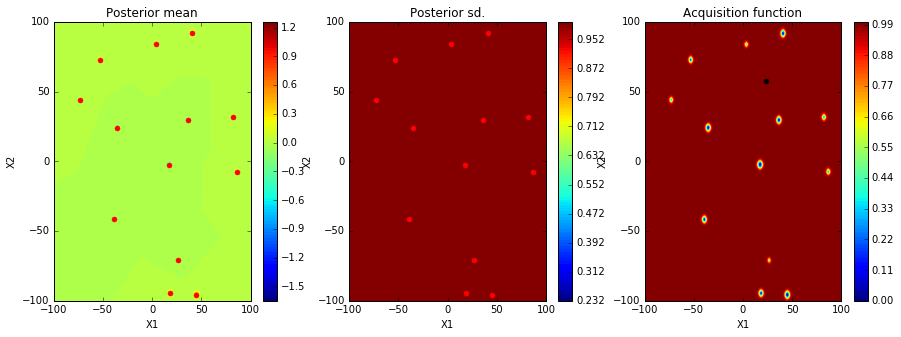

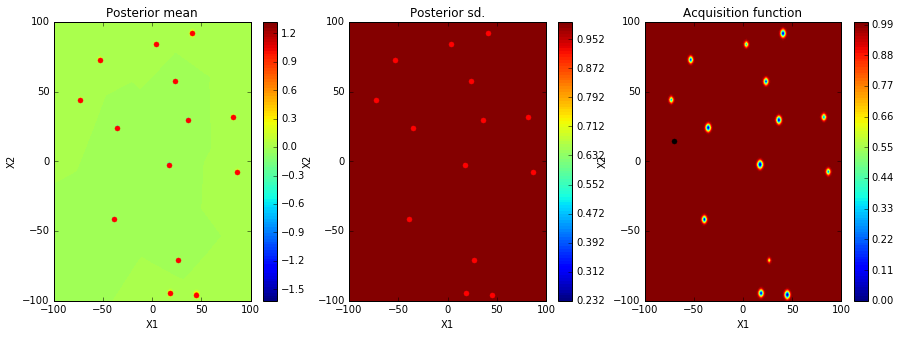

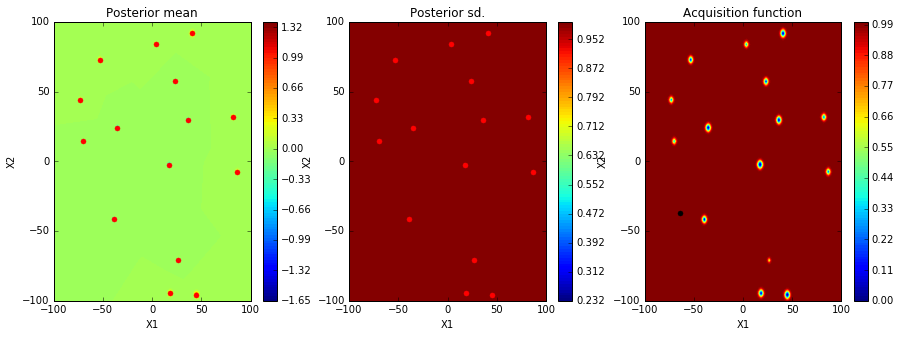

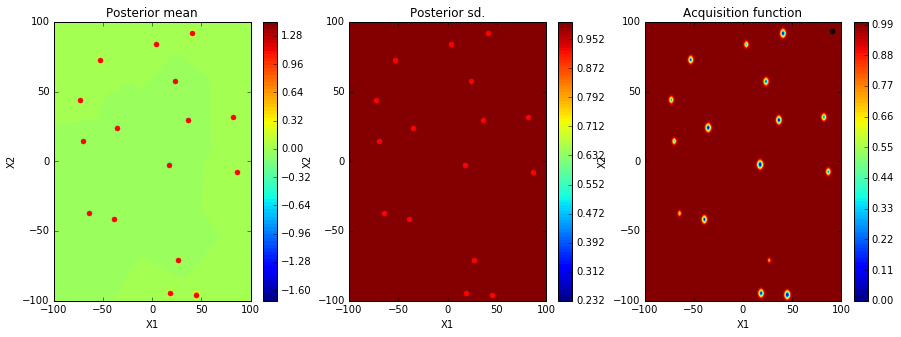

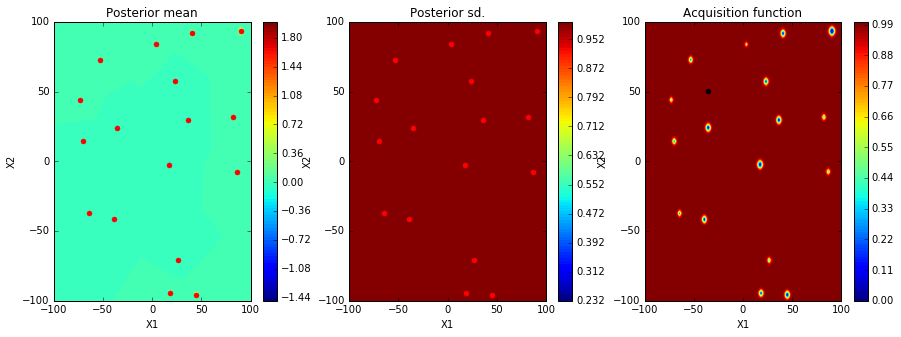

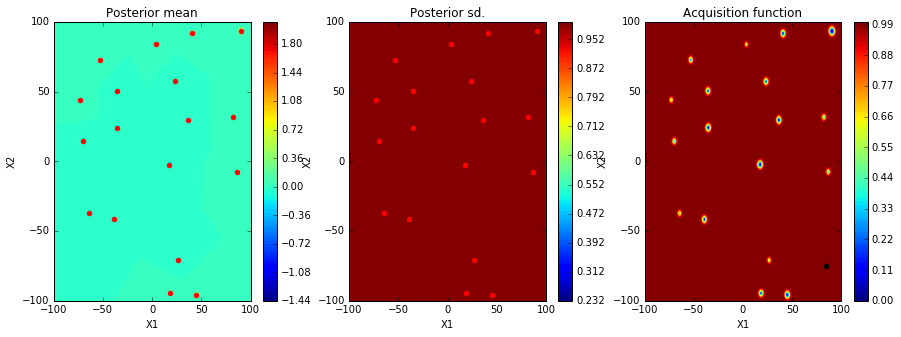

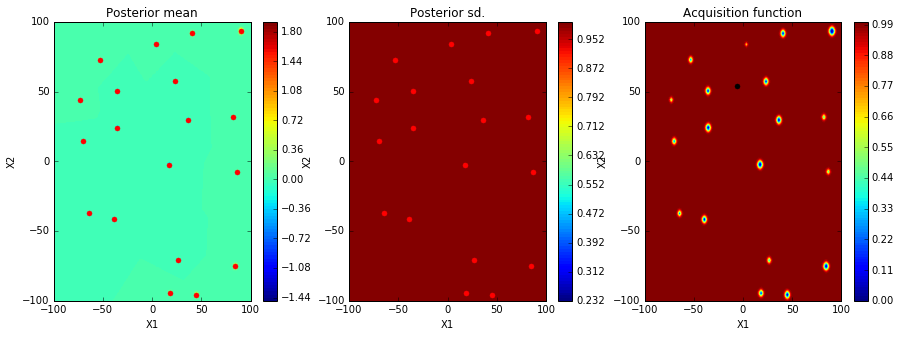

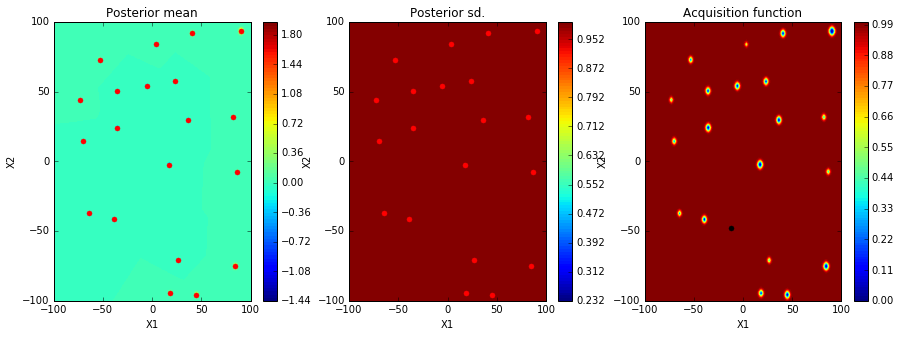

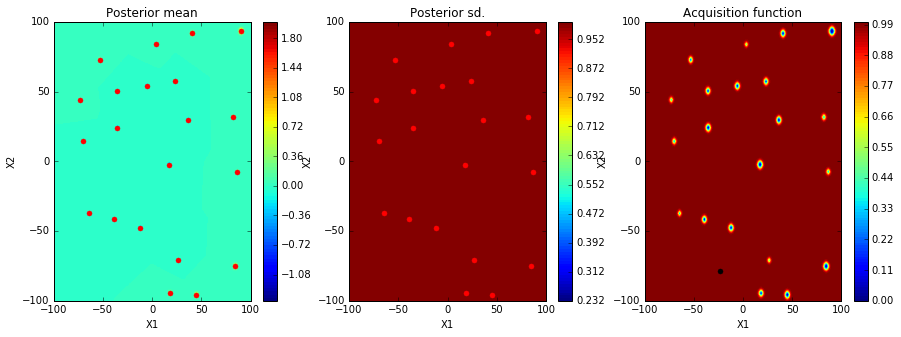

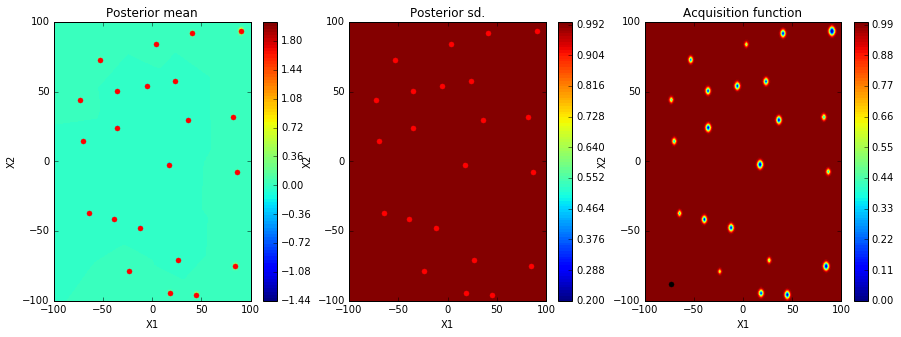

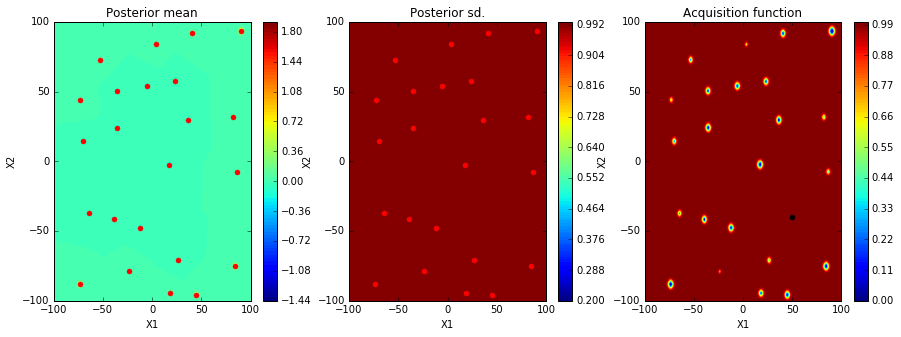

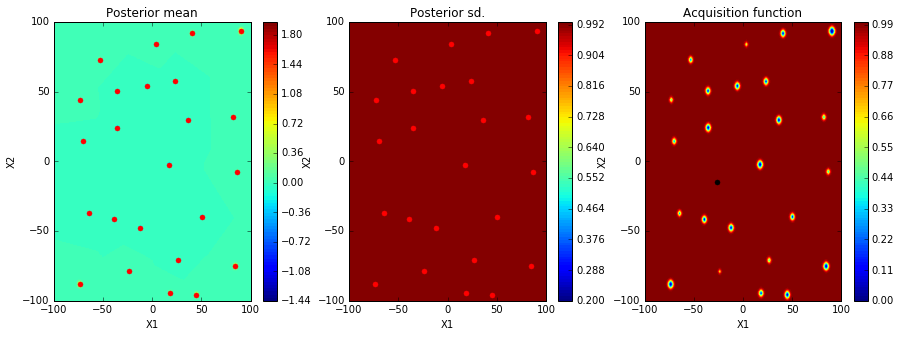

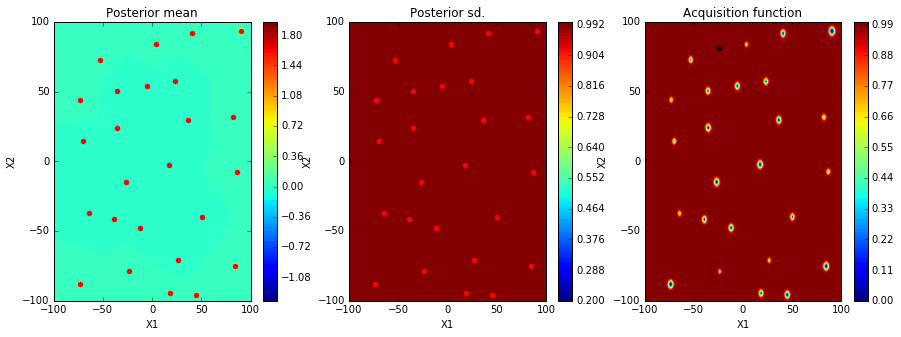

In [33]:
from IPython.display import clear_output

for i in tqdm(range(max_iter)):
    myProblem.run_optimization(max_iter=1) 
    myProblem.plot_acquisition()

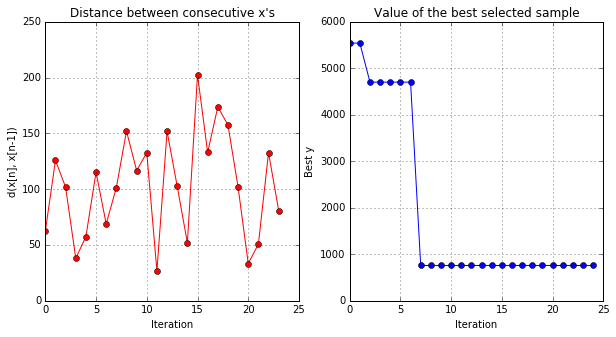

In [34]:
myProblem.plot_convergence()